<a href="https://colab.research.google.com/github/srivatsalnarayan/gold_price_prediction/blob/main/gold_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Random FOrest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gold_price /gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()
     

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:

correlation = gold_data.corr()

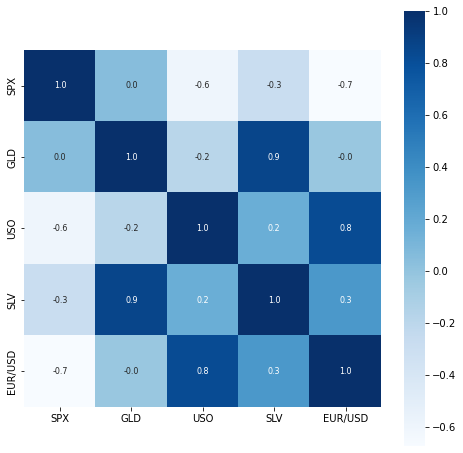

In [8]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [9]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


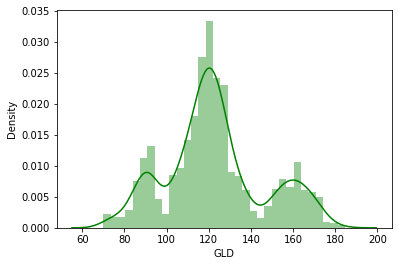

In [10]:
sns.distplot(gold_data['GLD'],color='green')


In [11]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [12]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [13]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


In [15]:
regressor = RandomForestRegressor(n_estimators=100)


In [16]:
regressor.fit(X_train,Y_train)


RandomForestRegressor()

In [17]:
test_data_prediction = regressor.predict(X_test)


In [18]:
print(test_data_prediction)


[168.65569934  82.20889974 115.79029985 127.62260028 120.83550116
 154.85119777 150.47279854 126.40370015 117.51029882 125.91940104
 116.72440095 171.97140125 141.59609879 167.65489866 115.10159992
 117.62370053 139.49460311 169.99240146 159.80700366 155.03409883
 155.18360056 125.55170033 175.86219947 157.83360294 125.1848003
  93.78619951  77.77050033 120.40479999 119.15239974 167.50580059
  88.26060028 125.3478998   91.21850083 117.69010013 121.13249928
 136.42080092 115.62210109 115.08870069 146.45209998 106.926201
 104.26580269  87.17999758 126.4559003  117.8268004  153.74579913
 119.71809977 108.39519994 107.94299813  93.14720047 127.13509771
  75.33120017 113.56149898 121.18269972 111.25259888 118.85809917
 120.66819913 160.30319988 167.99000106 146.71869691  85.78659853
  94.15300051  86.85809891  90.63570015 119.07090051 126.47660059
 127.58880016 170.01749979 122.34209953 117.55339905  98.7819005
 168.54730138 142.87799781 131.55890307 121.11150209 120.96069936
 119.68450079 

In [19]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9887801569776916


In [20]:
Y_test = list(Y_test)


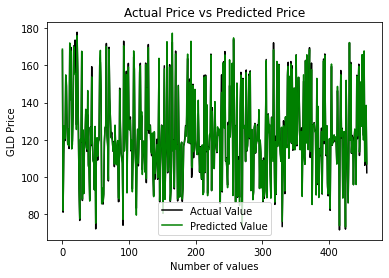

In [26]:
plt.plot(Y_test, color='black', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()